In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('student-mat.csv')
# data.describe()

data = data.ffill()
data



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<Axes: >

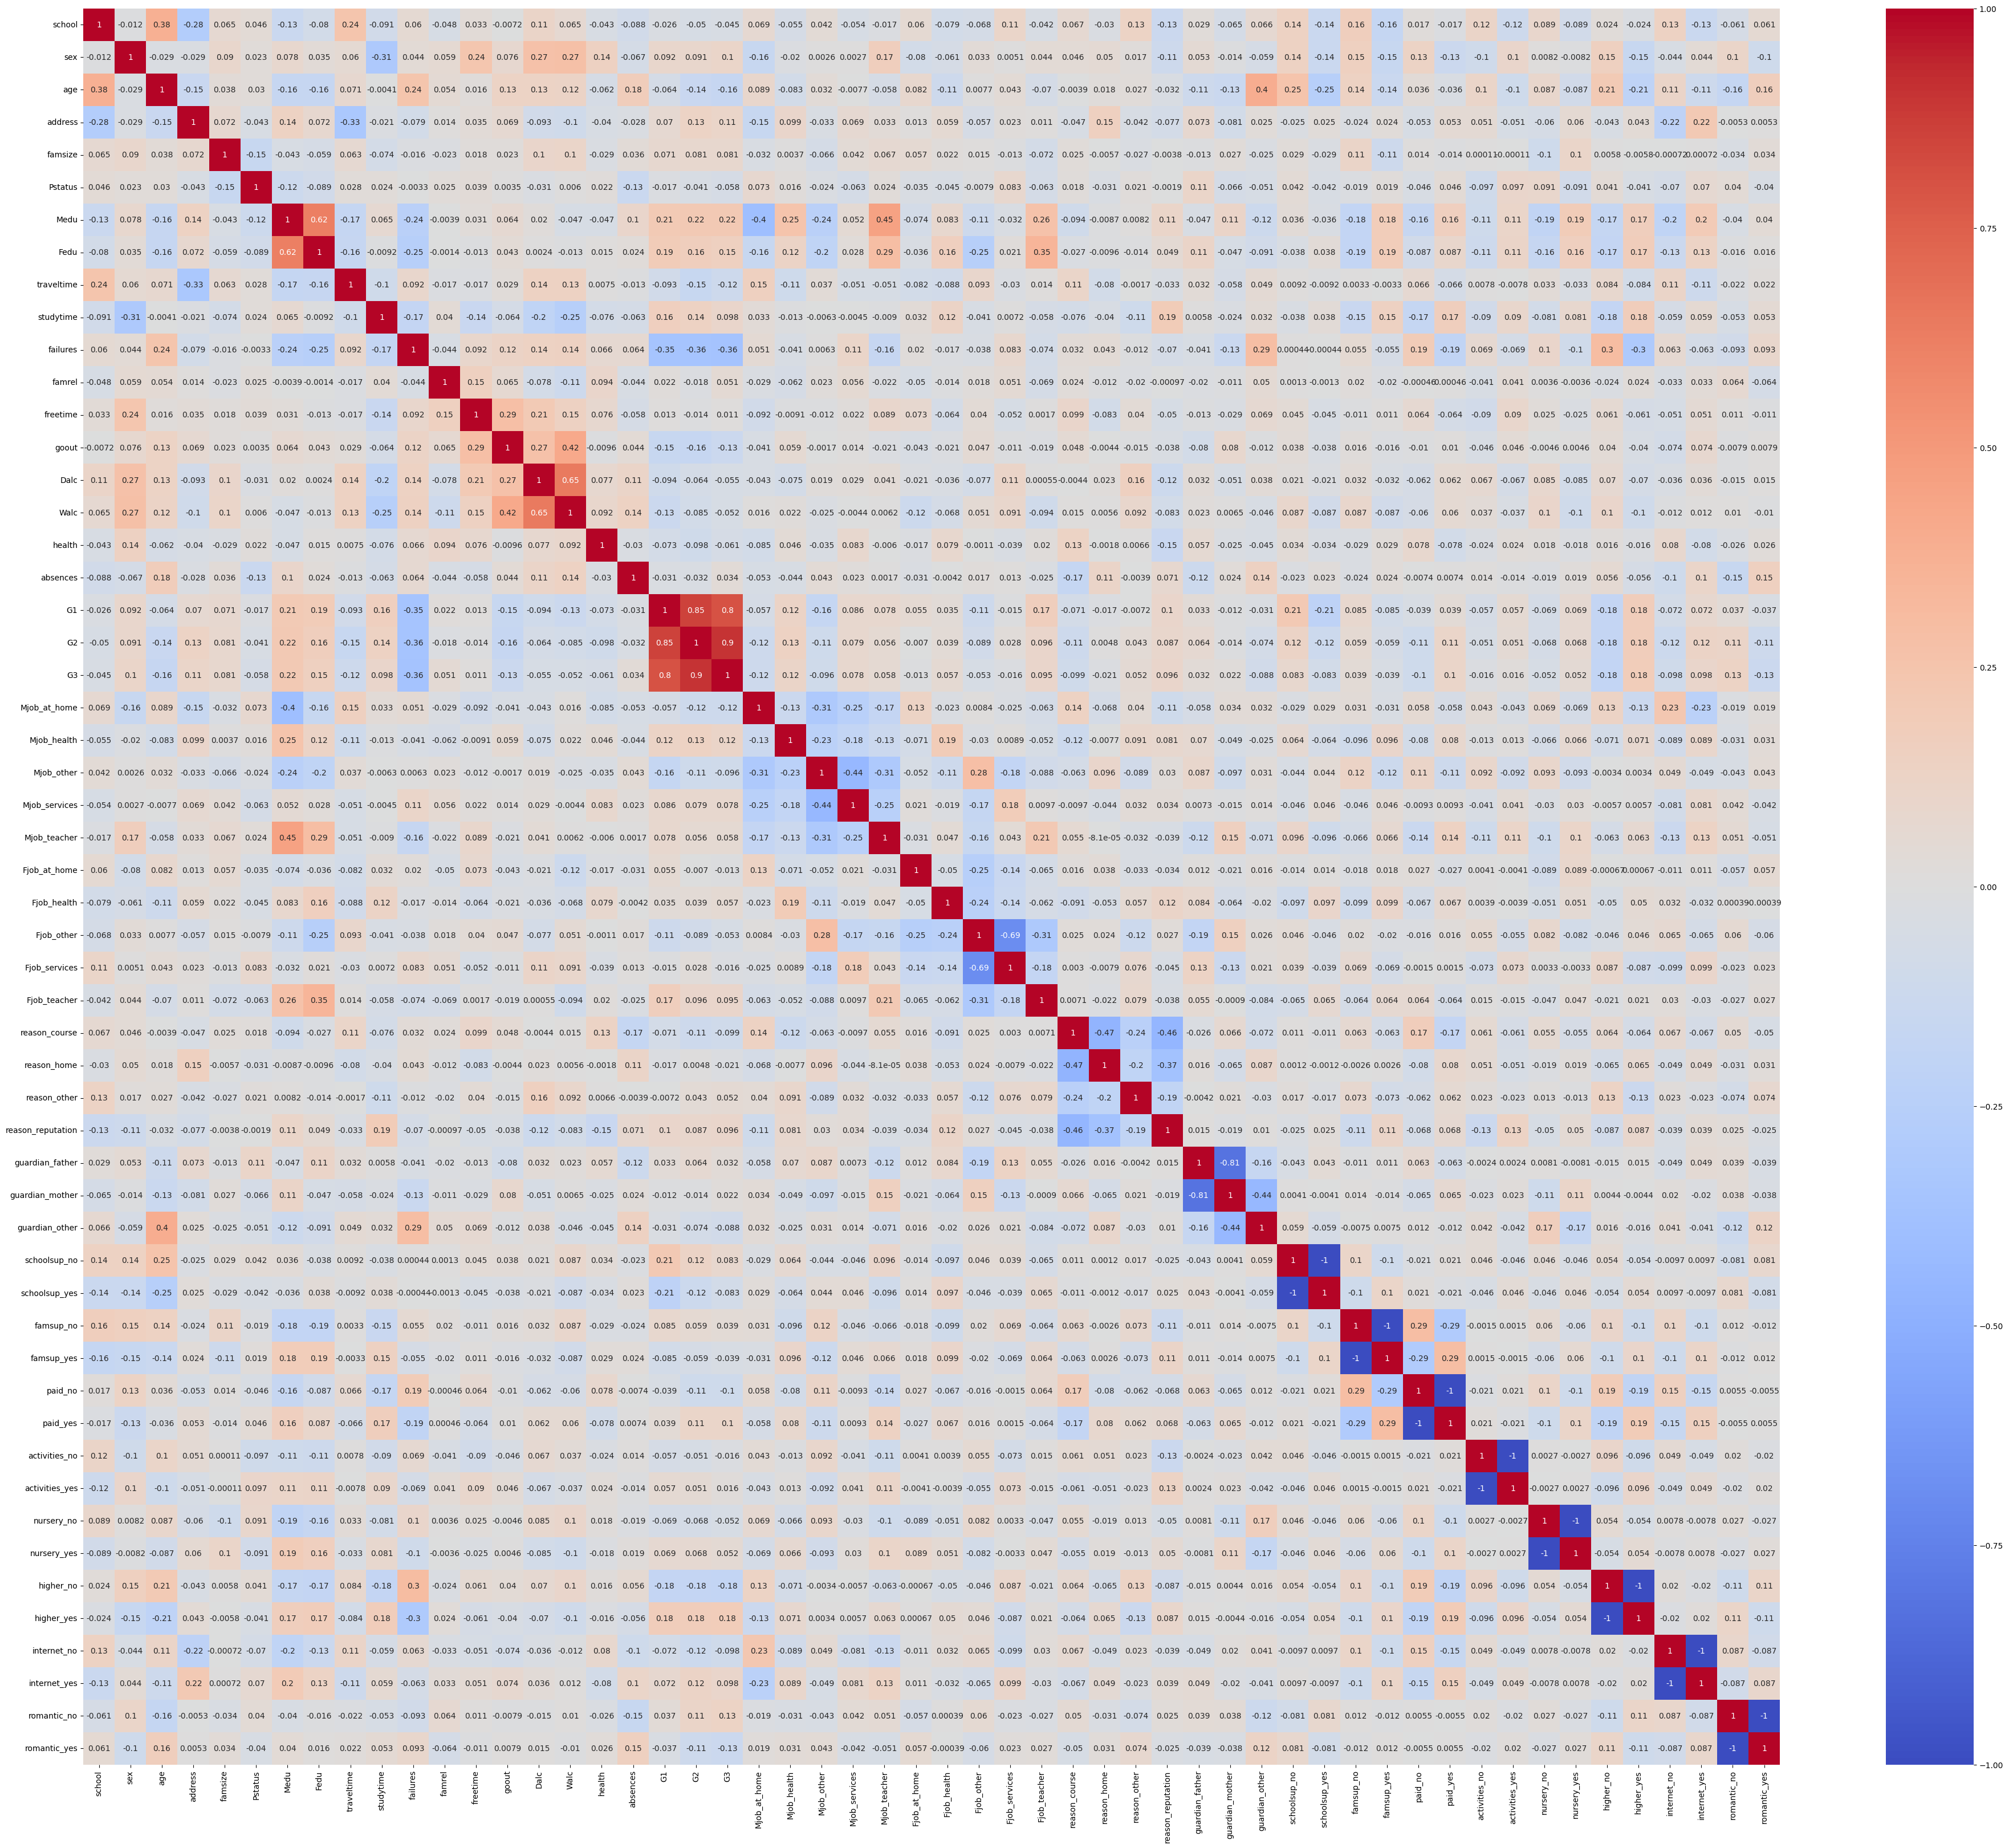

In [24]:
encoder = OrdinalEncoder()
data['sex'] =  encoder.fit_transform(data['sex'].astype('str').values.reshape(-1, 1))
data['school'] =  encoder.fit_transform(data['school'].astype('str').values.reshape(-1, 1))
data['address'] =  encoder.fit_transform(data['address'].astype('str').values.reshape(-1, 1))
data['famsize'] =  encoder.fit_transform(data['famsize'].astype('str').values.reshape(-1, 1))
data['Pstatus'] =  encoder.fit_transform(data['Pstatus'].astype('str').values.reshape(-1, 1))


data = pd.get_dummies(data)

#Statistical Analysis and cleanup
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = data.corr()
plt.figure(figsize=(48, 40)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')


In [25]:
Y = data['G1']
X = data.drop(['G1','G2','G3'], axis=1)

In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Max Decision Tree score: 0.15384615384615385


In [27]:
# #KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.2


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [28]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma=0.1, kernel= 'rbf')

cv_scores = cross_val_score(svc, X_scaled, Y,cv=2)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Max SVC score: 0.13705583756345177
